Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
train shape:60000
test shape:10000


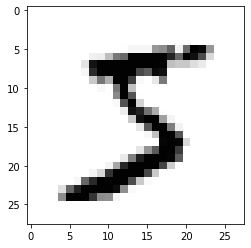

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print('train shape:%d' %(X_train.shape[0]))
print('test shape:%d' %(X_test.shape[0]))

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print('class : %d'%(Y_class_train[0]))

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])


Epoch 00001: val_loss improved from inf to 0.15488, saving model to ./model/01-0.1549.hdf5

Epoch 00002: val_loss improved from 0.15488 to 0.10538, saving model to ./model/02-0.1054.hdf5

Epoch 00003: val_loss improved from 0.10538 to 0.08518, saving model to ./model/03-0.0852.hdf5

Epoch 00004: val_loss improved from 0.08518 to 0.07754, saving model to ./model/04-0.0775.hdf5

Epoch 00005: val_loss improved from 0.07754 to 0.06819, saving model to ./model/05-0.0682.hdf5

Epoch 00006: val_loss improved from 0.06819 to 0.06094, saving model to ./model/06-0.0609.hdf5

Epoch 00007: val_loss did not improve from 0.06094

Epoch 00008: val_loss improved from 0.06094 to 0.05901, saving model to ./model/08-0.0590.hdf5

Epoch 00009: val_loss improved from 0.05901 to 0.05726, saving model to ./model/09-0.0573.hdf5

Epoch 00010: val_loss did not improve from 0.05726

Epoch 00011: val_loss did not improve from 0.05726

Epoch 00012: val_loss did not improve from 0.05726

Epoch 00013: val_loss did n

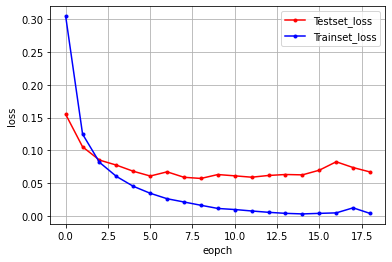

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('eopch')
plt.ylabel('loss')
plt.show()


Epoch 00001: val_loss improved from inf to 0.05409, saving model to ./model/01-0.0541.hd5

Epoch 00002: val_loss improved from 0.05409 to 0.03839, saving model to ./model/02-0.0384.hd5

Epoch 00003: val_loss improved from 0.03839 to 0.03178, saving model to ./model/03-0.0318.hd5

Epoch 00004: val_loss did not improve from 0.03178

Epoch 00005: val_loss did not improve from 0.03178

Epoch 00006: val_loss improved from 0.03178 to 0.02862, saving model to ./model/06-0.0286.hd5

Epoch 00007: val_loss did not improve from 0.02862

Epoch 00008: val_loss did not improve from 0.02862

Epoch 00009: val_loss improved from 0.02862 to 0.02774, saving model to ./model/09-0.0277.hd5

Epoch 00010: val_loss did not improve from 0.02774

Epoch 00011: val_loss did not improve from 0.02774

Epoch 00012: val_loss improved from 0.02774 to 0.02653, saving model to ./model/12-0.0265.hd5

Epoch 00013: val_loss improved from 0.02653 to 0.02621, saving model to ./model/13-0.0262.hd5

Epoch 00014: val_loss impr

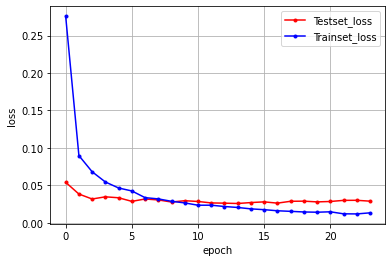

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hd5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
